In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_log_error
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

In [ ]:
#load data
df = pd.read_excel('Amin.xlsxj')

In [11]:
df.head()

,srm,pu,peou,trust,com_op,comit,sma
0,0.511883,0.676694,0.628389,0.477121,0.439333,0.397940,0.676694
1,0.397940,0.243038,0.397940,0.425969,0.397940,0.544068,0.628389
2,0.544068,0.397940,0.574031,0.425969,0.439333,0.653213,0.544068
3,0.628389,0.698970,0.544068,0.522879,0.676694,0.676694,0.574031
4,0.439333,0.511883,0.439333,0.425969,0.243038,0.397940,0.243038


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   srm     543 non-null    float64
 1   pu      543 non-null    float64
 2   peou    543 non-null    float64
 3   trust   543 non-null    float64
 4   com_op  543 non-null    float64
 5   comit   543 non-null    float64
 6   sma     543 non-null    float64
dtypes: float64(7)
memory usage: 29.8 KB


In [5]:
## Evaluate the target variable for imbalance
print(df['srm'].value_counts())  # or replace 'bmi' with your target column

# If you want to check another column, e.g., 'ca', uncomment the next line:
# print(df['ca'].value_counts())

# Check for missing values
print(df.isnull().sum())
# Check for duplicates
print(df.duplicated().sum())
# Check the data types
print(df.dtypes)
# Check the shape of the DataFrame
print(df.shape)
# Check the summary statistics
print(df.describe())


srm
0.352183    50
0.439333    49
0.574031    44
0.544068    43
0.477121    39
0.511883    39
0.301030    35
0.602060    33
0.397940    33
0.096910    33
0.243038    28
0.176091    24
0.628389    18
0.653213    17
0.676694    16
0.000000    12
0.698970     9
0.720159     7
0.759668     5
0.740363     4
0.778151     2
0.845098     2
0.829304     1
Name: count, dtype: int64
srm       0
pu        0
peou      0
trust     0
com_op    0
comit     0
sma       0
dtype: int64
0
srm       float64
pu        float64
peou      float64
trust     float64
com_op    float64
comit     float64
sma       float64
dtype: object
(543, 7)
              srm          pu        peou       trust      com_op       comit  \
count  543.000000  543.000000  543.000000  543.000000  543.000000  543.000000   
mean     0.441133    0.456491    0.452223    0.451186    0.459243    0.449282   
std      0.179709    0.169347    0.184685    0.157376    0.150039    0.155658   
min      0.000000    0.000000    0.000000    0.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   srm     543 non-null    float64
 1   pu      543 non-null    float64
 2   peou    543 non-null    float64
 3   trust   543 non-null    float64
 4   com_op  543 non-null    float64
 5   comit   543 non-null    float64
 6   sma     543 non-null    float64
dtypes: float64(7)
memory usage: 29.8 KB


<Axes: >

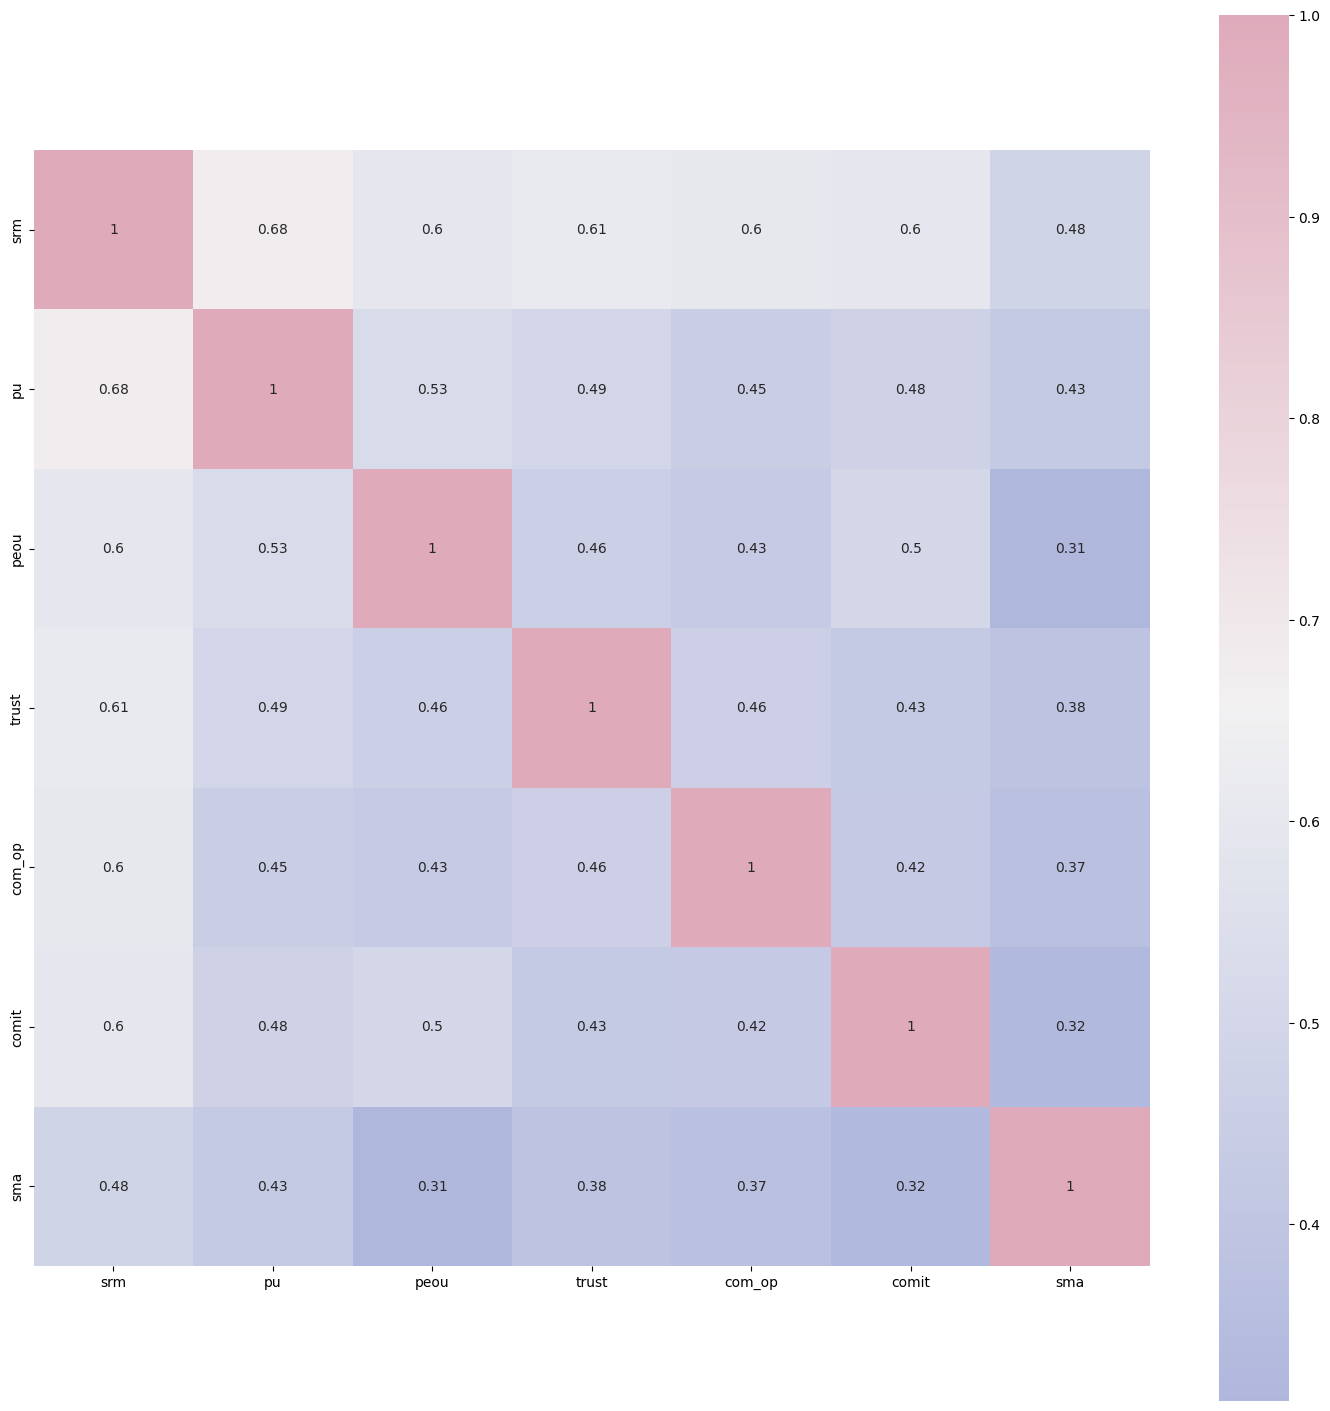

In [7]:
# Correlation amongst numeric attributes
corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [8]:
# Missing values in numeric variables
missing_values = df.isnull().sum()
print("Missing values in numeric variables:")
print(missing_values)


Missing values in numeric variables:
srm       0
pu        0
peou      0
trust     0
com_op    0
comit     0
sma       0
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [13]:
# Prepairing attributes of scale data

features = df.drop(['srm'], axis=1) # dropping target and extra columns

target = df['srm']

#Set up a standard scaler for the features
scaler = StandardScaler()
# Fit the scaler to the features
scaler.fit(features)
# Transform the features
features = scaler.transform(features)
# Convert the scaled features back to a DataFrame
features = pd.DataFrame(features, columns=df.columns[:-1])  # Exclude the target column 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
srm,543.0,-1.799256e-16,1.000922,-2.698083,-0.616512,0.121937,0.694723,1.901172
pu,543.0,-3.263197e-16,1.000922,-2.450884,-0.542184,0.134938,0.660154,2.129236
peou,543.0,1.243123e-16,1.000922,-2.869567,-0.529216,0.164948,0.719227,1.921634
trust,543.0,-5.643123e-17,1.000922,-3.063644,-0.714209,0.119266,0.765760,2.127459
com_op,543.0,8.014870e-17,1.000922,-2.889002,-0.624373,0.179017,0.802175,2.114721
comit,543.0,-1.439405e-16,1.000922,-2.654814,-0.607106,0.119330,0.682798,2.167038


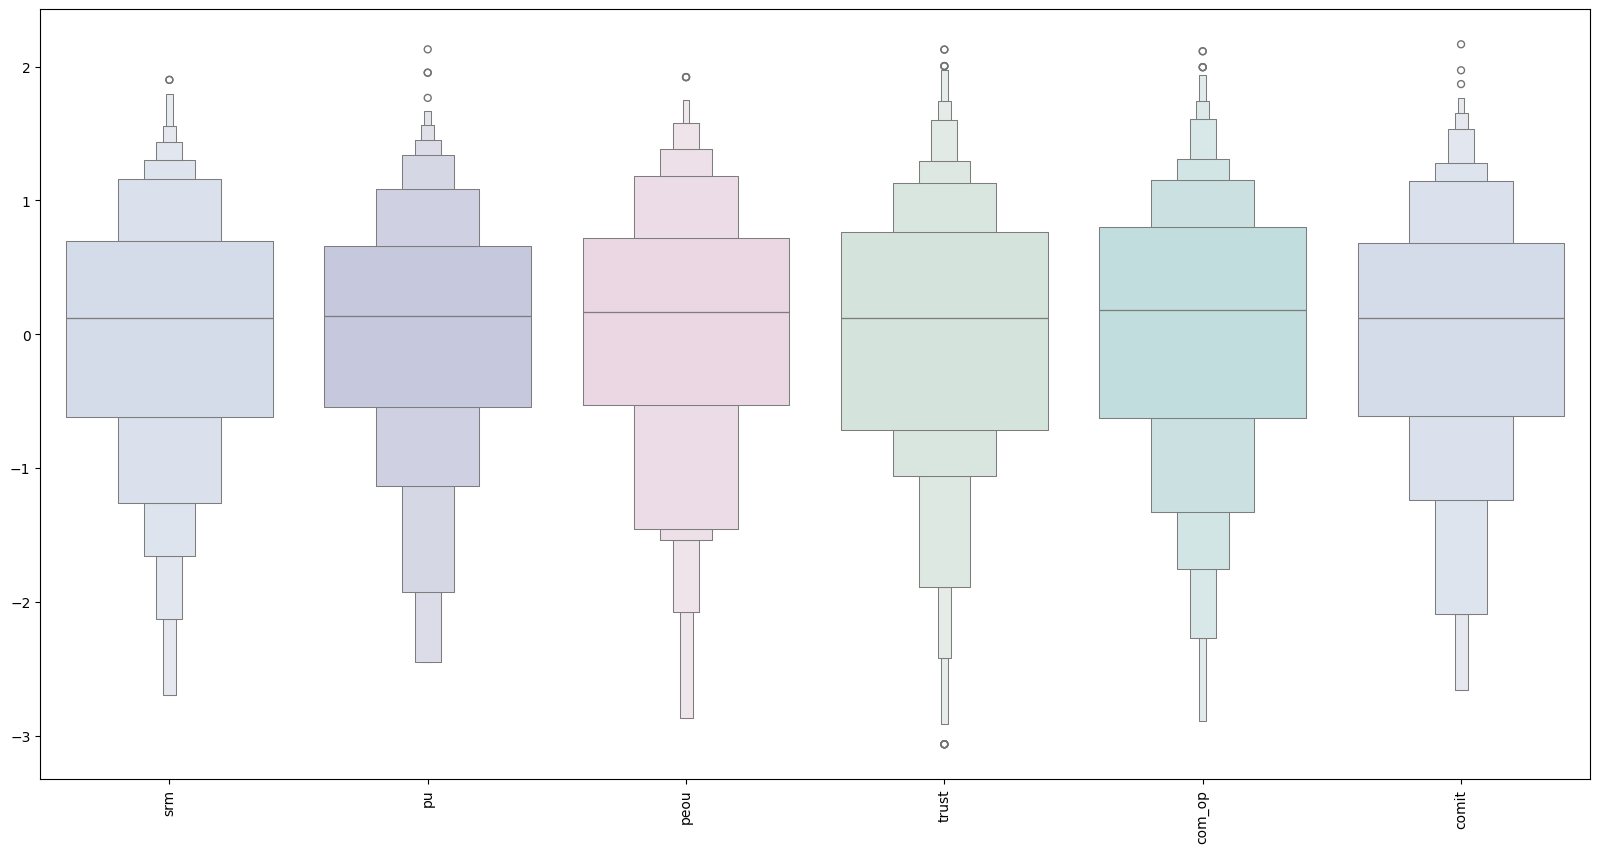

In [14]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [13]:
# Display the full DataFrame without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)

          srm        pu      peou     trust    com_op     comit       sma
0    0.511883  0.676694  0.628389  0.477121  0.439333  0.397940  0.676694
1    0.397940  0.243038  0.397940  0.425969  0.397940  0.544068  0.628389
2    0.544068  0.397940  0.574031  0.425969  0.439333  0.653213  0.544068
3    0.628389  0.698970  0.544068  0.522879  0.676694  0.676694  0.574031
4    0.439333  0.511883  0.439333  0.425969  0.243038  0.397940  0.243038
5    0.439333  0.477121  0.439333  0.367977  0.477121  0.602060  0.628389
6    0.653213  0.676694  0.628389  0.564271  0.759668  0.653213  0.653213
7    0.653213  0.544068  0.574031  0.425969  0.477121  0.511883  0.759668
8    0.439333  0.397940  0.511883  0.367977  0.397940  0.574031  0.243038
9    0.511883  0.477121  0.477121  0.602060  0.397940  0.676694  0.439333
10   0.352183  0.439333  0.477121  0.221849  0.352183  0.439333  0.352183
11   0.397940  0.397940  0.096910  0.425969  0.397940  0.511883  0.477121
12   0.511883  0.574031  0.653213  0.5

In [15]:
 
features["srm"] = target
#Dropping with outlier (only for columns that exist)
# features = features[(features["ca"]<4.5)]  # 'srm' does not exist
# features = features[(features["ti"]<2.8)]   # 'pu' does not exist
features = features[(features["srm"]<2.1)]    # 'peou' exists
# features = features[(features["trust"]<4)&(features["trust"]>-4)]  # 'trust' does not exist
# features = features[(features["comtiment"]<4.5)&(features["comtiment"]>-4.5)]  # 'comtiment' does not exist

features.shape

(543, 6)

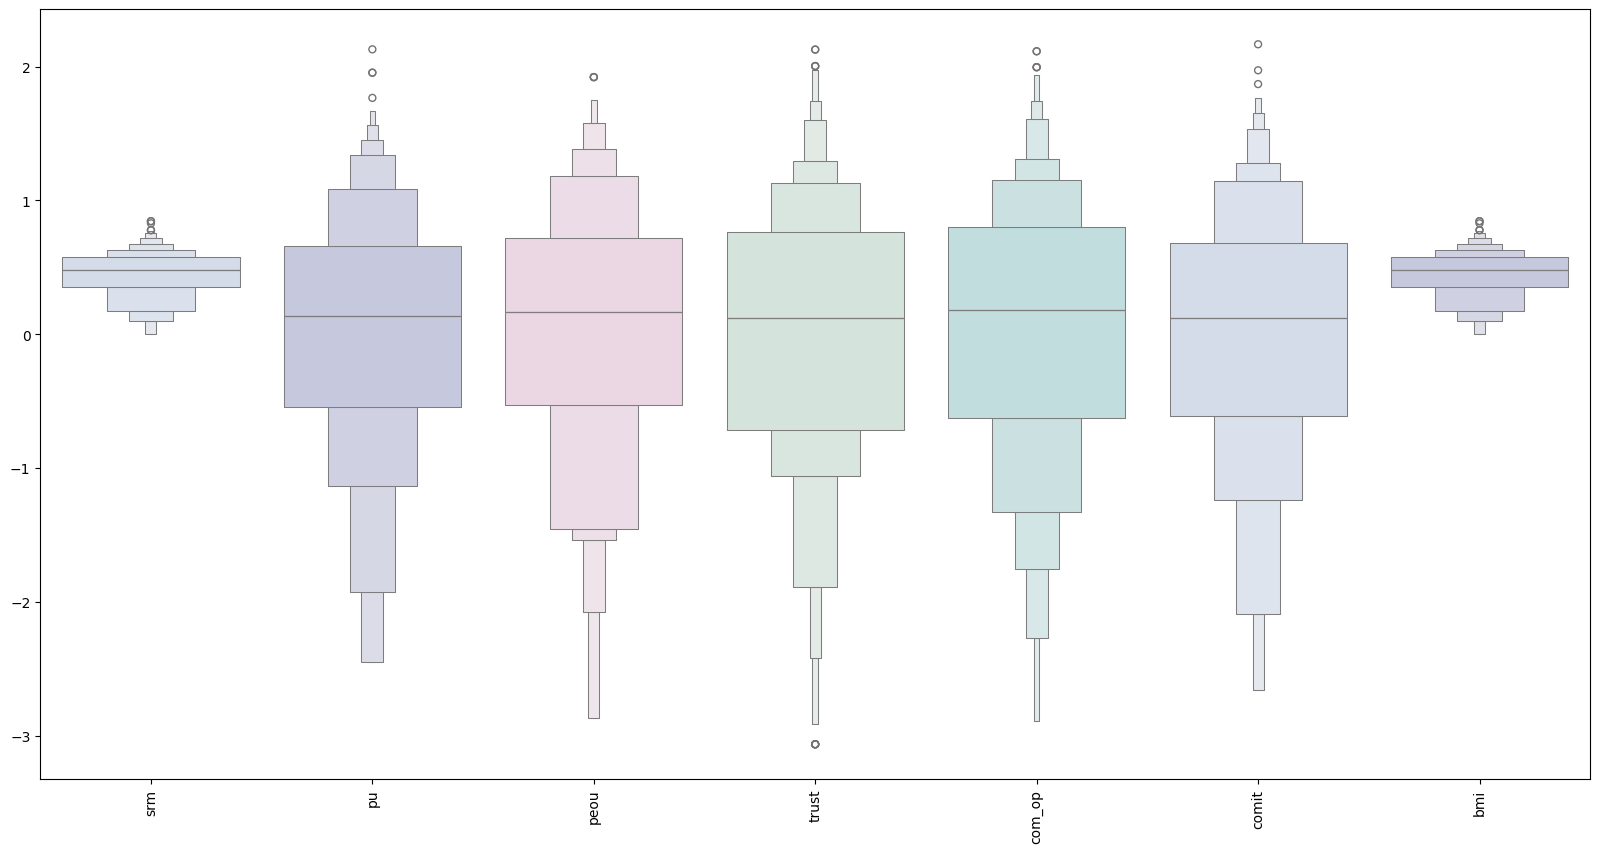

In [16]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [17]:
X = features.drop(["srm"], axis=1)
y = features["srm"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(543, 5)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks

# Early stopping
early_stopping = callbacks.EarlyStopping(
    patience=500,
    verbose=1,
    min_delta=0.005,
    restore_best_weights=True
)

# Initialize model
model = Sequential()

# Input + Hidden Layer 1
model.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))

# Hidden Layer 2
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.3))

# Hidden Layer 3
model.add(Dense(units=64, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))

# Hidden Layer 4
model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.2))

# Hidden Layer 5
model.add(Dense(units=16, kernel_initializer='he_uniform', activation='relu'))

# Output Layer
model.add(Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mae', 'mse'])

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=1000,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


In [1]:
from docx import Document
from docx.shared import Inches

# Create a new Word document
doc = Document()
doc.add_heading('Hyperparameter Configuration for ANN Model', level=1)

# Add table with 3 columns
table = doc.add_table(rows=1, cols=3)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Hyperparameter'
hdr_cells[1].text = 'Value / Setting'
hdr_cells[2].text = 'Purpose / Notes'

# Data to insert
data = [
    ("EarlyStopping", "patience = 500", "Waits 500 epochs with no improvement."),
    ("", "min_delta = 0.005", "Requires minimum 0.005 improvement."),
    ("", "restore_best_weights = True", "Rolls back to best-performing weights."),
    
    ("Units in Dense Layers", "Hidden1 = 128", "First hidden layer."),
    ("", "Hidden2 = 64", "Second hidden layer."),
    ("", "Hidden3 = 64", "Third hidden layer."),
    ("", "Hidden4 = 32", "Fourth hidden layer."),
    ("", "Hidden5 = 16", "Fifth hidden layer."),
    
    ("Output Layer Units", "1", "Single regression output."),
    
    ("Kernel Initializer", "he_uniform", "Helps with ReLU activations."),
    
    ("Activation Functions", "ReLU (hidden), Linear (output)", "ReLU is fast and robust. Linear for regression."),
    
    ("Dropout Rates", "0.3 (L1, L2), 0.2 (L3, L4)", "Reduces overfitting by ignoring neurons."),
    
    ("Input Dimension", "X_train.shape[1]", "Matches feature count of input data.")
]

# Add data to table
for hp, val, desc in data:
    row_cells = table.add_row().cells
    row_cells[0].text = hp
    row_cells[1].text = val
    row_cells[2].text = desc

# Save the document
doc.save("ANN_Hyperparameters.docx")
print("✅ Word document 'ANN_Hyperparameters.docx' generated successfully.")


✅ Word document 'ANN_Hyperparameters.docx' generated successfully.


In [3]:
from docx import Document
from docx.shared import Pt

# Create document
doc = Document()
doc.add_heading('ANN Model Performance Summary', level=1)

# Add introductory paragraph
p = doc.add_paragraph()
p.add_run(
    'Table below presents the Mean and Standard Deviation (SD) of Testing and Training RMSE '
    'over 10 runs for three models, A, B, and C. '
    'Model C exhibits the lowest mean testing RMSE (0.0489) and balanced performance, '
    'making it the most accurate and stable among the three.'
).font.size = Pt(11)

# Add table
table = doc.add_table(rows=1, cols=7)
table.style = 'Table Grid'
hdr = table.rows[0].cells
hdr_text = [
    "Model",
    "Mean Test RMSE",
    "Mean Train RMSE",
    "SD Test RMSE",
    "SD Train RMSE",
    "Runs"
]
# Ensure header fits columns (7 cols—Model, TestMean, TrainMean, SDTest, SDTrain, ??? Actually 6)
for idx, text in enumerate(hdr_text):
    hdr[idx].text = text

# Data rows
data = [
    ("A", 0.0505, 0.0438, 0.0016, 0.0014),
    ("B", 0.0504, 0.0438, 0.0084, 0.0016),
    ("C", 0.0489, 0.0413, 0.0077, 0.0063)
]

for model, mt, tr, st, sr in data:
    row = table.add_row().cells
    row[0].text = model
    row[1].text = f"{mt:.4f}"
    row[2].text = f"{tr:.4f}"
    row[3].text = f"{st:.4f}"
    row[4].text = f"{sr:.4f}"

# Save document
doc.save("ANN_Performance_Summary.docx")
print("✅ 'ANN_Performance_Summary.docx' generated successfully.")


✅ 'ANN_Performance_Summary.docx' generated successfully.


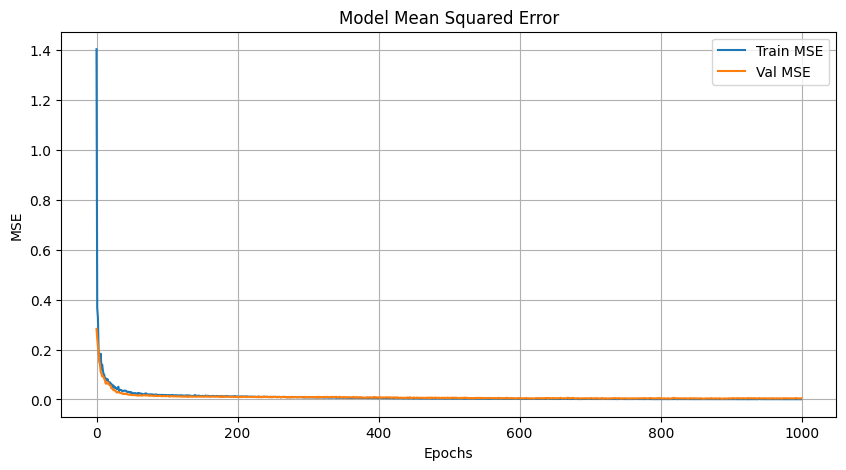

In [24]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Val MSE')
plt.title('Model Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [ ]:
#write shap analysis
import shap
# Initialize the SHAP explainer
explainer = shap.KernelExplainer(model.predict, X_train)
# Calculate SHAP values
shap_values = explainer.shap_values(X_test, nsamples=100)
# Visualize SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar") 


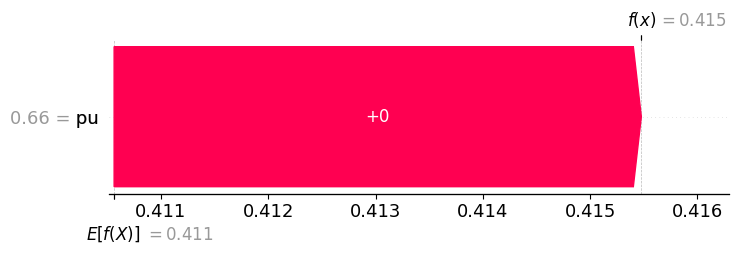

In [26]:
# Choose instance index
instance_index = 0

# Create SHAP Explanation object
explanation = shap.Explanation(
    values=shap_values[instance_index, 0],  # fix shape
    base_values=explainer.expected_value[0],  # for regression, use index 0
    data=X_test.iloc[instance_index],
    feature_names=X_test.columns
)

# Plot
shap.plots.waterfall(explanation, max_display=10, show=True)


In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate predictions using your trained model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluation metrics for test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train set metrics:")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R2:   {train_r2:.4f}")
print(f" MSE:   {train_mse:.4f})

print("\nTest set metrics:")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R2:   {test_r2:.4f}")

In [19]:
# Load dataset
df = pd.read_excel("Amin.xlsx")


In [21]:
df.head()

,srm,pu,peou,trust,com_op,comit,sma
0,0.511883,0.676694,0.628389,0.477121,0.439333,0.397940,0.676694
1,0.397940,0.243038,0.397940,0.425969,0.397940,0.544068,0.628389
2,0.544068,0.397940,0.574031,0.425969,0.439333,0.653213,0.544068
3,0.628389,0.698970,0.544068,0.522879,0.676694,0.676694,0.574031
4,0.439333,0.511883,0.439333,0.425969,0.243038,0.397940,0.243038


In [22]:
#drop pu, peou
df = df.drop(columns=["pu", "peou"])


In [23]:
X = df.drop(columns=["srm"])  # Features
y = df["srm"]  # Target variable

In [24]:
# Ensure all required imports are present
%pip install scikit-learn pandas tensorflow --quiet
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the build_model function
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# Training and logging
results = []

for t_idx in range(3):  # Three experimental ANN runs
    train_rmses, test_rmses = [], []

    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = build_model(X_train.shape[1])
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,
                  callbacks=[early_stopping], verbose=0)

        y_train_pred = model.predict(X_train, verbose=0)
        y_test_pred = model.predict(X_test, verbose=0)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)
        results.append([i+1, f"ANN-{t_idx+1}", train_rmse, test_rmse])

    results.append(['Mean', f"ANN-{t_idx+1}", np.mean(train_rmses), np.mean(test_rmses)])
    results.append(['SD', f"ANN-{t_idx+1}", np.std(train_rmses), np.std(test_rmses)])

results_df = pd.DataFrame(results, columns=['Network', 'Model', 'Training RMSE', 'Testing RMSE'])
pivot_df = results_df.pivot(index='Network', columns='Model')
pivot_df.columns = [f'{col[1]} {col[0]}' for col in pivot_df.columns.values]
pivot_df = pivot_df.reset_index()

pd.set_option('display.float_format', lambda x: f'{x:.3f}')
print(pivot_df)
%pip install scikit-learn pandas tensorflow --quiet
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the build_model function
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# Training and logging
results = []

for t_idx in range(3):  # Three experimental ANN runs
    train_rmses, test_rmses = [], []

    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = build_model(X_train.shape[1])
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

        model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2,
                  callbacks=[early_stopping], verbose=0)

        y_train_pred = model.predict(X_train, verbose=0)
        y_test_pred = model.predict(X_test, verbose=0)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        train_rmses.append(train_rmse)
        test_rmses.append(test_rmse)
        results.append([i+1, f"ANN-{t_idx+1}", train_rmse, test_rmse])

    results.append(['Mean', f"ANN-{t_idx+1}", np.mean(train_rmses), np.mean(test_rmses)])
    results.append(['SD', f"ANN-{t_idx+1}", np.std(train_rmses), np.std(test_rmses)])

results_df = pd.DataFrame(results, columns=['Network', 'Model', 'Training RMSE', 'Testing RMSE'])
pivot_df = results_df.pivot(index='Network', columns='Model')
pivot_df.columns = [f'{col[1]} {col[0]}' for col in pivot_df.columns.values]
pivot_df = pivot_df.reset_index()

pd.set_option('display.float_format', lambda x: f'{x:.3f}')
print(pivot_df)


Note: you may need to restart the kernel to use updated packages.
   Network  ANN-1 Training RMSE  ANN-2 Training RMSE  ANN-3 Training RMSE  \
0        1                0.102                0.107                0.101   
1        2                0.103                0.110                0.105   
2        3                0.104                0.103                0.106   
3        4                0.104                0.106                0.101   
4        5                0.098                0.100                0.100   
5        6                0.107                0.105                0.107   
6        7                0.102                0.103                0.101   
7        8                0.106                0.104                0.103   
8        9                0.105                0.110                0.105   
9       10                0.098                0.100                0.102   
10    Mean                0.103                0.105                0.103   
11      SD

In [32]:
from docx import Document
from docx.shared import Pt

# Create a new Word document
doc = Document()
doc.add_heading('ANN Regression Metrics Summary', level=1)

# Add metrics table
table = doc.add_table(rows=1, cols=3)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Metric'
hdr_cells[1].text = 'Train'
hdr_cells[2].text = 'Test'

metrics = [
    ('MAE', f"{train_mae:.4f}", f"{test_mae:.4f}"),
    ('MSE', f"{train_mse:.4f}", f"{test_mse:.4f}"),
    ('RMSE', f"{train_rmse:.4f}", f"{test_rmse:.4f}"),
    ('R2', f"{train_r2:.4f}", f"{test_r2:.4f}")
]

for metric, train_val, test_val in metrics:
    row = table.add_row().cells
    row[0].text = metric
    row[1].text = train_val
    row[2].text = test_val

doc.add_paragraph()  # Add space

# Add y_test and y_test_pred table
doc.add_heading('Test Set: True vs Predicted', level=2)
table2 = doc.add_table(rows=1, cols=3)
table2.style = 'Table Grid'
hdr2 = table2.rows[0].cells
hdr2[0].text = 'Index'
hdr2[1].text = 'y_test'
hdr2[2].text = 'y_test_pred'

for idx, (true_val, pred_val) in zip(y_test.index, zip(y_test.values, y_test_pred.flatten())):
    row = table2.add_row().cells
    row[0].text = str(idx)
    row[1].text = f"{true_val:.4f}"
    row[2].text = f"{pred_val:.4f}"

doc.add_paragraph()  # Add space

# Add y_train and y_train_pred table
doc.add_heading('Train Set: True vs Predicted', level=2)
table3 = doc.add_table(rows=1, cols=3)
table3.style = 'Table Grid'
hdr3 = table3.rows[0].cells
hdr3[0].text = 'Index'
hdr3[1].text = 'y_train'
hdr3[2].text = 'y_train_pred'

for idx, (true_val, pred_val) in zip(y_train.index, zip(y_train.values, y_train_pred.flatten())):
    row = table3.add_row().cells
    row[0].text = str(idx)
    row[1].text = f"{true_val:.4f}"
    row[2].text = f"{pred_val:.4f}"

# Save the document
doc.save("ANN_Regression_Results.docx")
print("✅ Word file 'ANN_Regression_Results.docx' saved successfully.")

✅ Word file 'ANN_Regression_Results.docx' saved successfully.



📊 Relative Importance Table (ANN):
   Network  ANN-1 Training RMSE  ANN-2 Training RMSE  ANN-3 Training RMSE  \
0        1                0.016                0.014                0.014   
1        2                0.013                0.016                0.012   
2        3                0.020                0.016                0.016   
3        4                0.016                0.016                0.019   
4        5                0.012                0.019                0.015   
5        6                0.015                0.022                0.016   
6        7                0.016                0.011                0.015   
7        8                0.015                0.016                0.015   
8        9                0.014                0.015                0.017   
9       10                0.021                0.014                0.018   
10    Mean                0.016                0.016                0.016   
11      SD                0.003         

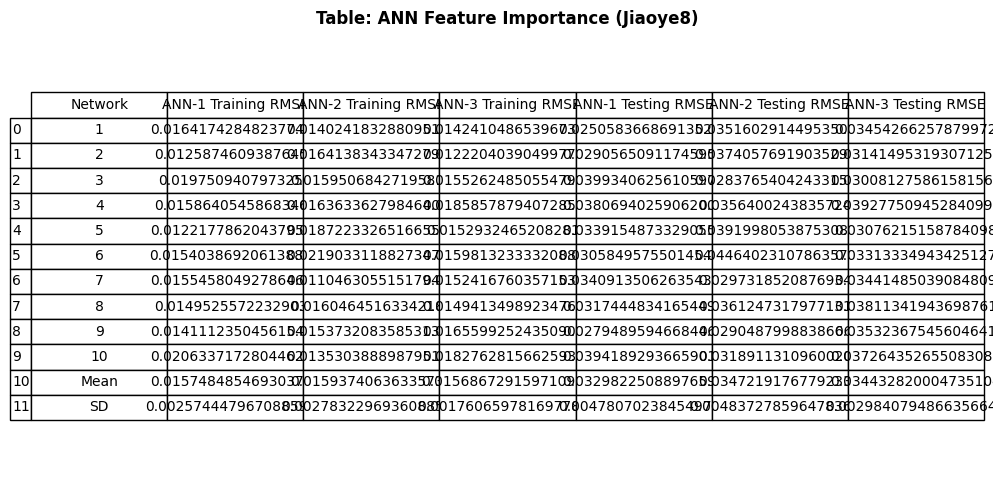

In [31]:

# Use the pivot_df DataFrame as formatted
formatted = pivot_df

# Display
print("\n📊 Relative Importance Table (ANN):")
print(formatted)

# Plot table as image
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
table = ax.table(cellText=formatted.values,
                 colLabels=formatted.columns,
                 rowLabels=formatted.index,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.3)

plt.title("Table: ANN Feature Importance (Jiaoye8)", fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("ann_feature_importance_jiaoye8.png", dpi=300)
plt.show()

In [75]:
from sklearn.inspection import permutation_importance

# Custom wrapper for Keras model to make it compatible with scikit-learn
class KerasModelWrapper:
    def __init__(self, model):
        self.model = model
    def fit(self, X, y):
        # Dummy fit method to satisfy scikit-learn API
        return self
    def predict(self, X):
        return self.model.predict(X, verbose=0).flatten()

# Wrap your trained Keras model
wrapped_model = KerasModelWrapper(model)

# Compute permutation importance
perm_importance = permutation_importance(
    estimator=wrapped_model,
    X=X_test,
    y=y_test,
    scoring='neg_mean_squared_error',
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("🔎 Relative Importance of Each Variable:")
print(importance_df)

🔎 Relative Importance of Each Variable:
  Feature  Importance
1      ti       0.358
0      ca       0.246
2      ie       0.100
3      sa       0.031


In [8]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [34]:
#load data
df = pd.read_excel('Amin.xlsx')

## model C


📊 Relative Importance Table (ANN - Jiaoye8):
                                         comit               com_op  \
1                            0.324749070974104  0.12533262374484777   
2                          0.22494568543936824   0.2031140749404706   
3                          0.12339262443566756  0.32188131256618907   
4                           0.1911973665954611  0.30324267740129596   
5                          0.22339961152749668   0.1497850467070645   
6                          0.10959194637609053  0.22662227674504765   
7                           0.1700668067961135  0.22266452295729205   
8                           0.1642679796745133  0.28650286035179373   
9                           0.2062898027511551  0.34772712539361383   
10                          0.0888135354054187  0.23011110397281023   
Average importance         0.18267144299753885  0.24169836247804252   
Normalized importance (%)                  76%                 100%   

                              

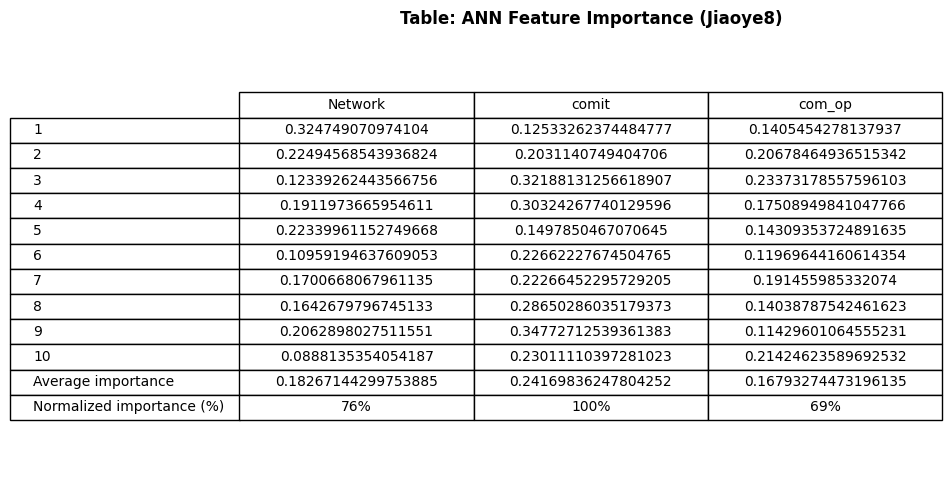

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("Amin.xlsx")

# Define features and target
features = ['comit', 'com_op', 'trust']
target = 'srm'

df = df[features + [target]].dropna()

X = df[features].values
y = df[target].values

# Normalize
X_scaled = MinMaxScaler().fit_transform(X)
y_scaled = MinMaxScaler().fit_transform(y.reshape(-1, 1)).flatten()

# Store importance results
importances_list = []

for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=seed)
    
    model = MLPRegressor(hidden_layer_sizes=(64,), max_iter=500, random_state=seed)
    model.fit(X_train, y_train)
    
    # Use permutation importance
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=seed)
    importances_list.append(result.importances_mean)

# Convert to DataFrame
importance_df = pd.DataFrame(importances_list, columns=features)
importance_df.index = np.arange(1, 11)

# Average and normalized
average = importance_df.mean()
normalized = 100 * average / average.max()

importance_df.loc['Average importance'] = average
importance_df.loc['Normalized importance (%)'] = normalized.round(0).astype(int).astype(str) + '%'

# Format for output
formatted = importance_df.round(3).astype(str)
formatted.loc['Normalized importance (%)'] = normalized.round(0).astype(int).astype(str) + '%'

# Display
print("\n📊 Relative Importance Table (ANN - Jiaoye8):")
print(formatted)

# Plot table as image
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
table = ax.table(cellText=formatted.values,
                 colLabels=['Network'] + features,
                 rowLabels=formatted.index,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.3)

plt.title("Table: ANN Feature Importance (Jiaoye8)", fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("ann_feature_importance_jiaoye8.png", dpi=300)

##### MODEL B

In [15]:
df = pd.read_excel("Amin.xlsx")

In [16]:
#define features and target
features = ['sma','trust','com_op','comit' ]
target = 'srm'

In [17]:
from sklearn.neural_network import MLPRegressor



📊 Relative Importance Table (ANN - Jiaoye8):
                                            sma                comit  \
1                          0.042947852833602106  0.14383396823165445   
2                           0.13969050233543276  0.22119205512887624   
3                            0.2377879381580208  0.08630002773139987   
4                             0.086409381788231  0.22458162070015697   
5                           0.07869096579650127  0.10450999651469613   
6                           0.06674322652689825  0.15382609206222655   
7                           0.05819107098912775  0.15767695512761704   
8                          0.056844154781920564   0.1893911934153824   
9                            0.0940842414646964  0.12504707347023242   
10                           0.0720287382268431   0.1150324160125179   
Average importance           0.0933418072901274  0.15213913983947602   
Normalized importance (%)                   60%                  97%   

                 

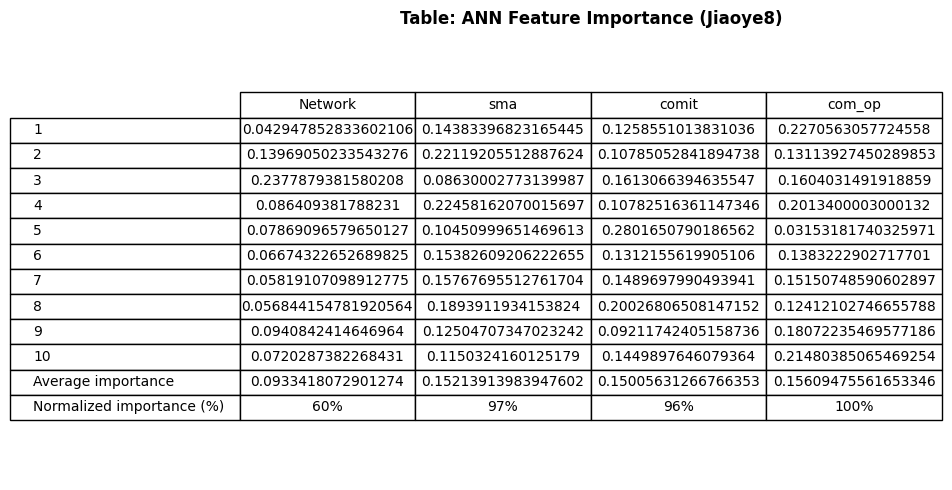

In [18]:
from sklearn.inspection import permutation_importance

# If you want to predict 'srm', set target = 'srm'
# Here, let's use 'bmi' as the target for demonstration
target = 'srm'

# Use correct feature names from the DataFrame
features = ['sma','comit', 'com_op', 'trust']

X = df[features].values
y = df[target].values

# Normalize
X_scaled = MinMaxScaler().fit_transform(X)
y_scaled = MinMaxScaler().fit_transform(y.reshape(-1, 1)).flatten()

# Store importance results
importances_list = []
for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=seed)
    model = MLPRegressor(hidden_layer_sizes=(64,), max_iter=500, random_state=seed)
    model.fit(X_train, y_train)
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=seed)
    importances_list.append(result.importances_mean)

# Convert to DataFrame
importance_df = pd.DataFrame(importances_list, columns=features)
importance_df.index = np.arange(1, len(importance_df) + 1)

# Average and normalized
average = importance_df.mean()
normalized = 100 * average / average.max()

importance_df.loc['Average importance'] = average
importance_df.loc['Normalized importance (%)'] = normalized.round(0).astype(int).astype(str) + '%'

# Format for output
formatted = importance_df.round(3).astype(str)
formatted.loc['Normalized importance (%)'] = normalized.round(0).astype(int).astype(str) + '%'

# Display
print("\n📊 Relative Importance Table (ANN - Jiaoye8):")
print(formatted)

# Plot table as image
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
table = ax.table(cellText=formatted.values,
                 colLabels=['Network'] + features,
                 rowLabels=formatted.index,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.3)

plt.title("Table: ANN Feature Importance (Jiaoye8)", fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("ann_feature_importance_jiaoye8.png", dpi=300)
plt.show()

#MODEL A

In [19]:
df = pd.read_excel("Amin.xlsx")
df.head()

,srm,pu,peou,trust,com_op,comit,sma
0,0.511883,0.676694,0.628389,0.477121,0.439333,0.397940,0.676694
1,0.397940,0.243038,0.397940,0.425969,0.397940,0.544068,0.628389
2,0.544068,0.397940,0.574031,0.425969,0.439333,0.653213,0.544068
3,0.628389,0.698970,0.544068,0.522879,0.676694,0.676694,0.574031
4,0.439333,0.511883,0.439333,0.425969,0.243038,0.397940,0.243038


In [20]:
#define features and target
features = ['pu', 'peou' ]
target = 'sma'


📊 Relative Importance Table (ANN - Jiaoye8):
                                            pu                   peou
1                          0.13495204432862334    0.10620659522387607
2                           0.3134045969656246  0.0008185515147778655
3                          0.12270153652726827     0.0906264002214642
4                           0.1426878213245295    0.03469148559100564
5                          0.25086780963463723   0.010959848686707485
6                          0.17444889791570461   0.050498227803112763
7                          0.17827126309399088     0.1133160473272512
8                          0.19360281740706697    0.12158133058028242
9                          0.21458530239229257    0.03681997544273349
10                         0.06475411777554652   0.029547565110805928
Average importance         0.17902762073652845    0.05950660275020171
Normalized importance (%)                 100%                    33%


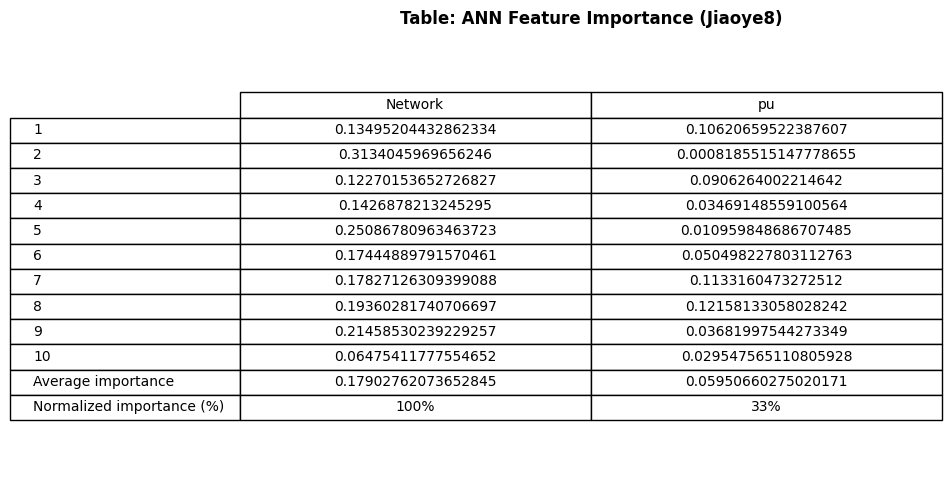

In [21]:
from sklearn.inspection import permutation_importance

# If you want to predict 'srm', set target = 'srm'
# Here, let's use 'bmi' as the target for demonstration
target = 'sma'

# Use correct feature names from the DataFrame
features = ['pu', 'peou']

X = df[features].values
y = df[target].values

# Normalize
X_scaled = MinMaxScaler().fit_transform(X)
y_scaled = MinMaxScaler().fit_transform(y.reshape(-1, 1)).flatten()

# Store importance results
importances_list = []
for seed in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=seed)
    model = MLPRegressor(hidden_layer_sizes=(64,), max_iter=500, random_state=seed)
    model.fit(X_train, y_train)
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=seed)
    importances_list.append(result.importances_mean)

# Convert to DataFrame
importance_df = pd.DataFrame(importances_list, columns=features)
importance_df.index = np.arange(1, len(importance_df) + 1)

# Average and normalized
average = importance_df.mean()
normalized = 100 * average / average.max()

importance_df.loc['Average importance'] = average
importance_df.loc['Normalized importance (%)'] = normalized.round(0).astype(int).astype(str) + '%'

# Format for output
formatted = importance_df.round(3).astype(str)
formatted.loc['Normalized importance (%)'] = normalized.round(0).astype(int).astype(str) + '%'

# Display
print("\n📊 Relative Importance Table (ANN - Jiaoye8):")
print(formatted)

# Plot table as image
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
table = ax.table(cellText=formatted.values,
                 colLabels=['Network'] + features,
                 rowLabels=formatted.index,
                 loc='center',
                 cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.3)

plt.title("Table: ANN Feature Importance (Jiaoye8)", fontsize=12, weight='bold')
plt.tight_layout()
plt.savefig("ann_feature_importance_jiaoye8.png", dpi=300)
plt.show()

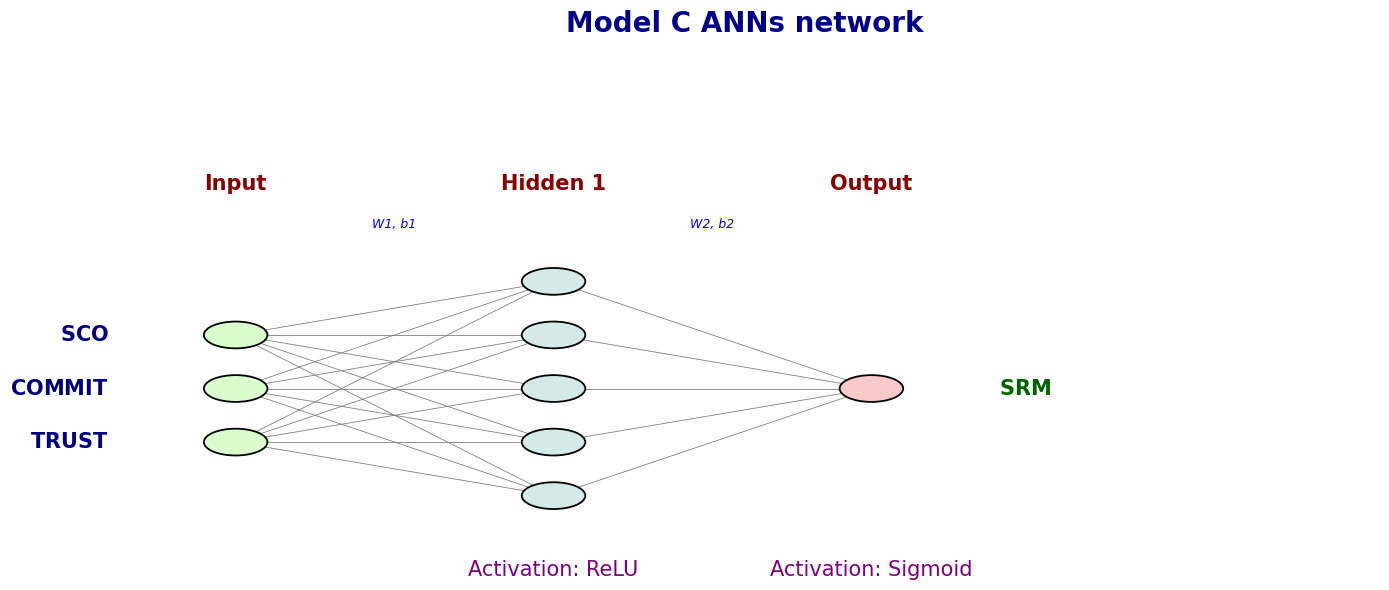

: 

In [ ]:
import matplotlib.pyplot as plt

def draw_final_ann(ax, left, right, bottom, top, layer_sizes, layer_names, input_labels, output_labels):
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Custom color palette
    layer_colors = ["#d9fccd", "#d3eae9", "#f8c9c9", "#b5afe6"]  # pastel orange, green, blue, red

    neuron_positions = []
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        layer_pos = []
        for m in range(layer_size):
            x = n*h_spacing + left
            y = layer_top - m*v_spacing
            circle = plt.Circle((x, y), v_spacing/4, color=layer_colors[n], ec='black', lw=1.3, zorder=4)
            ax.add_artist(circle)
            layer_pos.append((x, y))
        neuron_positions.append(layer_pos)

    # Draw connections + weight/bias labels
    for n in range(len(layer_sizes) - 1):
        for (x1, y1) in neuron_positions[n]:
            for (x2, y2) in neuron_positions[n + 1]:
                ax.add_artist(plt.Line2D([x1, x2], [y1, y2], c='gray', lw=0.6))
        x_mid = (n + 0.5) * h_spacing + left
        ax.text(x_mid, top + 0.05, f"W{n+1}, b{n+1}", ha='center', fontsize=9, color='blue', style='italic')

    # Layer names
    for n, name in enumerate(layer_names):
        x = n*h_spacing + left
        ax.text(x, top + 0.12, name, ha='center', fontsize=15, fontweight='bold', color='darkred')

    # Input labels (bold)
    for i, label in enumerate(input_labels):
        x, y = neuron_positions[0][i]
        ax.text(x - 0.1, y, f"$\\bf{{{label}}}$", ha='right', va='center', fontsize=15, color='navy')

    # Output labels (bold)
    for i, label in enumerate(output_labels):
        x, y = neuron_positions[-1][i]
        ax.text(x + 0.1, y, f"$\\bf{{{label}}}$", ha='left', va='center', fontsize=15, color='darkgreen')

    # Activation labels
    for i in range(1, len(layer_sizes)):
        x = i * h_spacing + left
        act = "ReLU" if i < len(layer_sizes) - 1 else "Sigmoid"
        ax.text(x, bottom - 0.1, f"Activation: {act}", ha='center', fontsize=15, color='purple')

fig = plt.figure(figsize=(14, 6))
ax = fig.gca()
ax.axis('off')

# Network structure
layer_sizes = [3, 5, 1]
input_labels = [
    'SCO',
    'COMMIT',
    'TRUST',
]
output_labels = ["SRM"]
layer_names = ["Input", "Hidden 1",  "Output"]

draw_final_ann(ax, .1, .6, .1, .6, layer_sizes, layer_names, input_labels, output_labels)
plt.title("Model C ANNs network", fontsize=20, color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show()


In [48]:
# Install shap if not already installed
%pip install shap

import shap

# For scikit-learn models, use model.predict as the first argument
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

Note: you may need to restart the kernel to use updated packages.


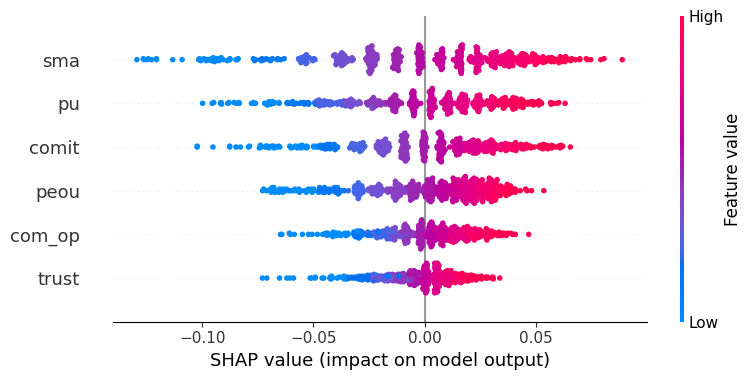

In [53]:
import shap

# Use the trained model for SHAP analysis
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

# Summary plot for feature importance
shap.summary_plot(shap_values, X, feature_names=features)

In [54]:
# Compute mean absolute SHAP value for each feature
feature_importance = np.abs(shap_values.values).mean(axis=0)
relative_importance = feature_importance / feature_importance.sum()

In [56]:
# Compute average importance and normalized importance
avg_importance = importance_df["Relative Importance"].mean()*100
normalized_importance = (importance_df["Relative Importance"] / importance_df["Relative Importance"].max()) * 100

KeyError: 'Relative Importance'

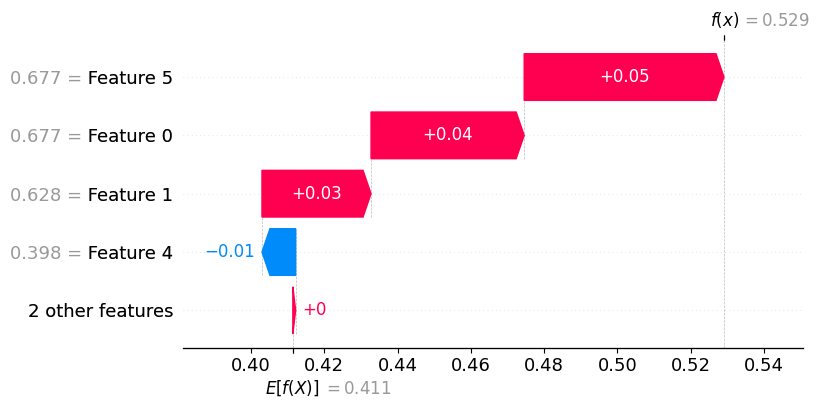

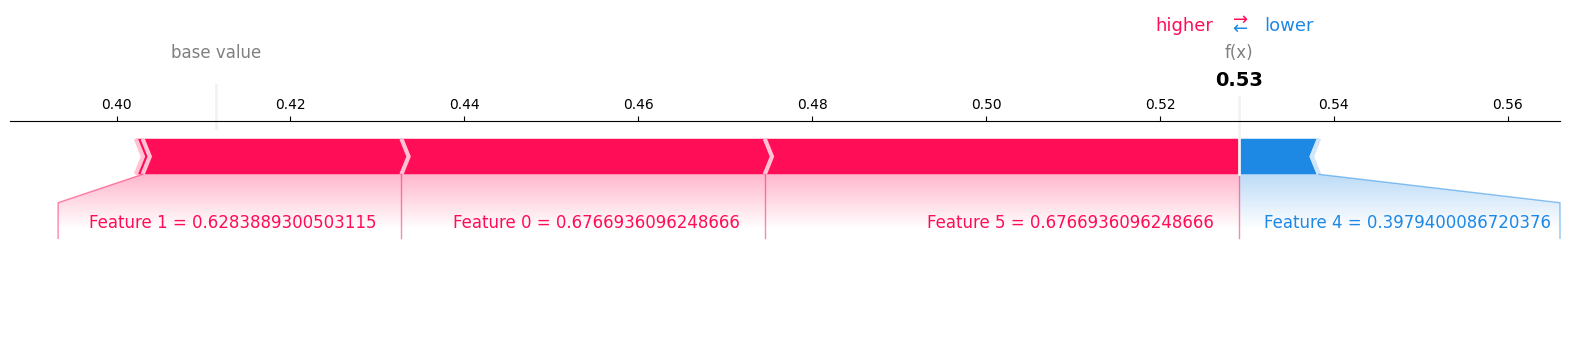

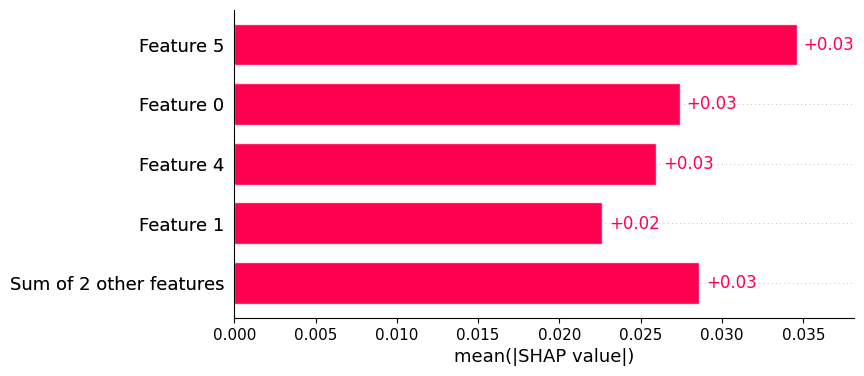

AttributeError: 'ExactExplainer' object has no attribute 'expected_value'

In [57]:
#write water fall plot
shap.plots.waterfall(shap_values[0], max_display=5, show=True)
#write force plot
shap.plots.force(shap_values[0], matplotlib=True, show=True)
#write bar plot
shap.plots.bar(shap_values, max_display=5, show=True)   
#write decision plot
expected_value = explainer.expected_value
if isinstance(expected_value, (list, np.ndarray)):
    expected_value = expected_value[0]
shap.decision_plot(expected_value, shap_values[0], X_test_df.iloc[0], show=True)
#write dependence plot
shap.dependence_plot("organization flexibilty", shap_values.values, X_test_df,
    interaction_index=None, show=True)  
#write interaction plot
shap.interaction_plot("organization flexibilty", "artificial inteligence", shap_values.values, X_test_df,
    show=True) 